## Pair Programming Intro Regresión Lineal

In [49]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics



In [50]:
df = pd.read_csv('../Datos/vinos_encoding_ordinal.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_le,marital_le
0,5524,1957,Graduation,Single,0.235696,0,0,04-09-2012,0.307039,635,...,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740,2,3
1,2174,1954,Graduation,Single,-0.235454,1,1,08-03-2014,-0.383664,11,...,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,3


In [51]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_le,marital_le
0,5524,1957,Graduation,Single,0.235696,0,0,04-09-2012,0.307039,635,...,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740,2,3
1,2174,1954,Graduation,Single,-0.235454,1,1,08-03-2014,-0.383664,11,...,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,3
2,4141,1965,Graduation,Together,0.773999,0,0,21-08-2013,-0.798086,426,...,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975,2,4
3,6182,1984,Graduation,Together,-1.022355,1,0,10-02-2014,-0.798086,11,...,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178,2,4
4,5324,1981,PhD,Married,0.241888,1,0,19-01-2014,1.550305,173,...,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458,4,2


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
* Deberéis separar la X y la y.
* Deberéis crear el train y el test.
* Ajustar vuestro modelo.

Separamos los datos de la x y la y

In [52]:
X = df.drop(["mnt_wines_box", 'mntwines_sin_cero', 'dt_customer', 'education', 'marital_status'], axis = 1)
y = df["mnt_wines_box"]

In [53]:
#comprobamos x

X.head(2)

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,education_le,marital_le
0,5524,1957,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,2,3
1,2174,1954,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,2,3


In [54]:
#comprobamos y
y.head(2)

0    14.026740
1     3.141178
Name: mnt_wines_box, dtype: float64

Dividimos nuestro modelo en train y test.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Iniciamos la regresión lineal.

In [56]:
lr = LinearRegression(n_jobs=-1)

Ajustamos el modelo.

In [57]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Hacemos las predicciones.

In [58]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [59]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
792,1.616108,4.169896,Train
1271,12.433631,13.243337,Train
1538,15.948894,15.924879,Train
668,4.727528,3.795017,Train
1975,3.796126,10.360312,Train


In [60]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
792,1.616108,4.169896,Train,-2.553789
1271,12.433631,13.243337,Train,-0.809706
1538,15.948894,15.924879,Train,0.024014
668,4.727528,3.795017,Train,0.932511
1975,3.796126,10.360312,Train,-6.564186


> Los residuos pueden ser nulos, positivos o negativos:

- Si son nulos entonces no existe ningún error en la estimación, ya que, los valores observados coinciden con los valores estimados.

- Si es positivo entonces el valor observado de Y es mayor que el valor estimado lo que implica que se infraestima la variable Y, en nuestro caso el precio de las casas.

- Si el residuo es negativo entonces el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las casas

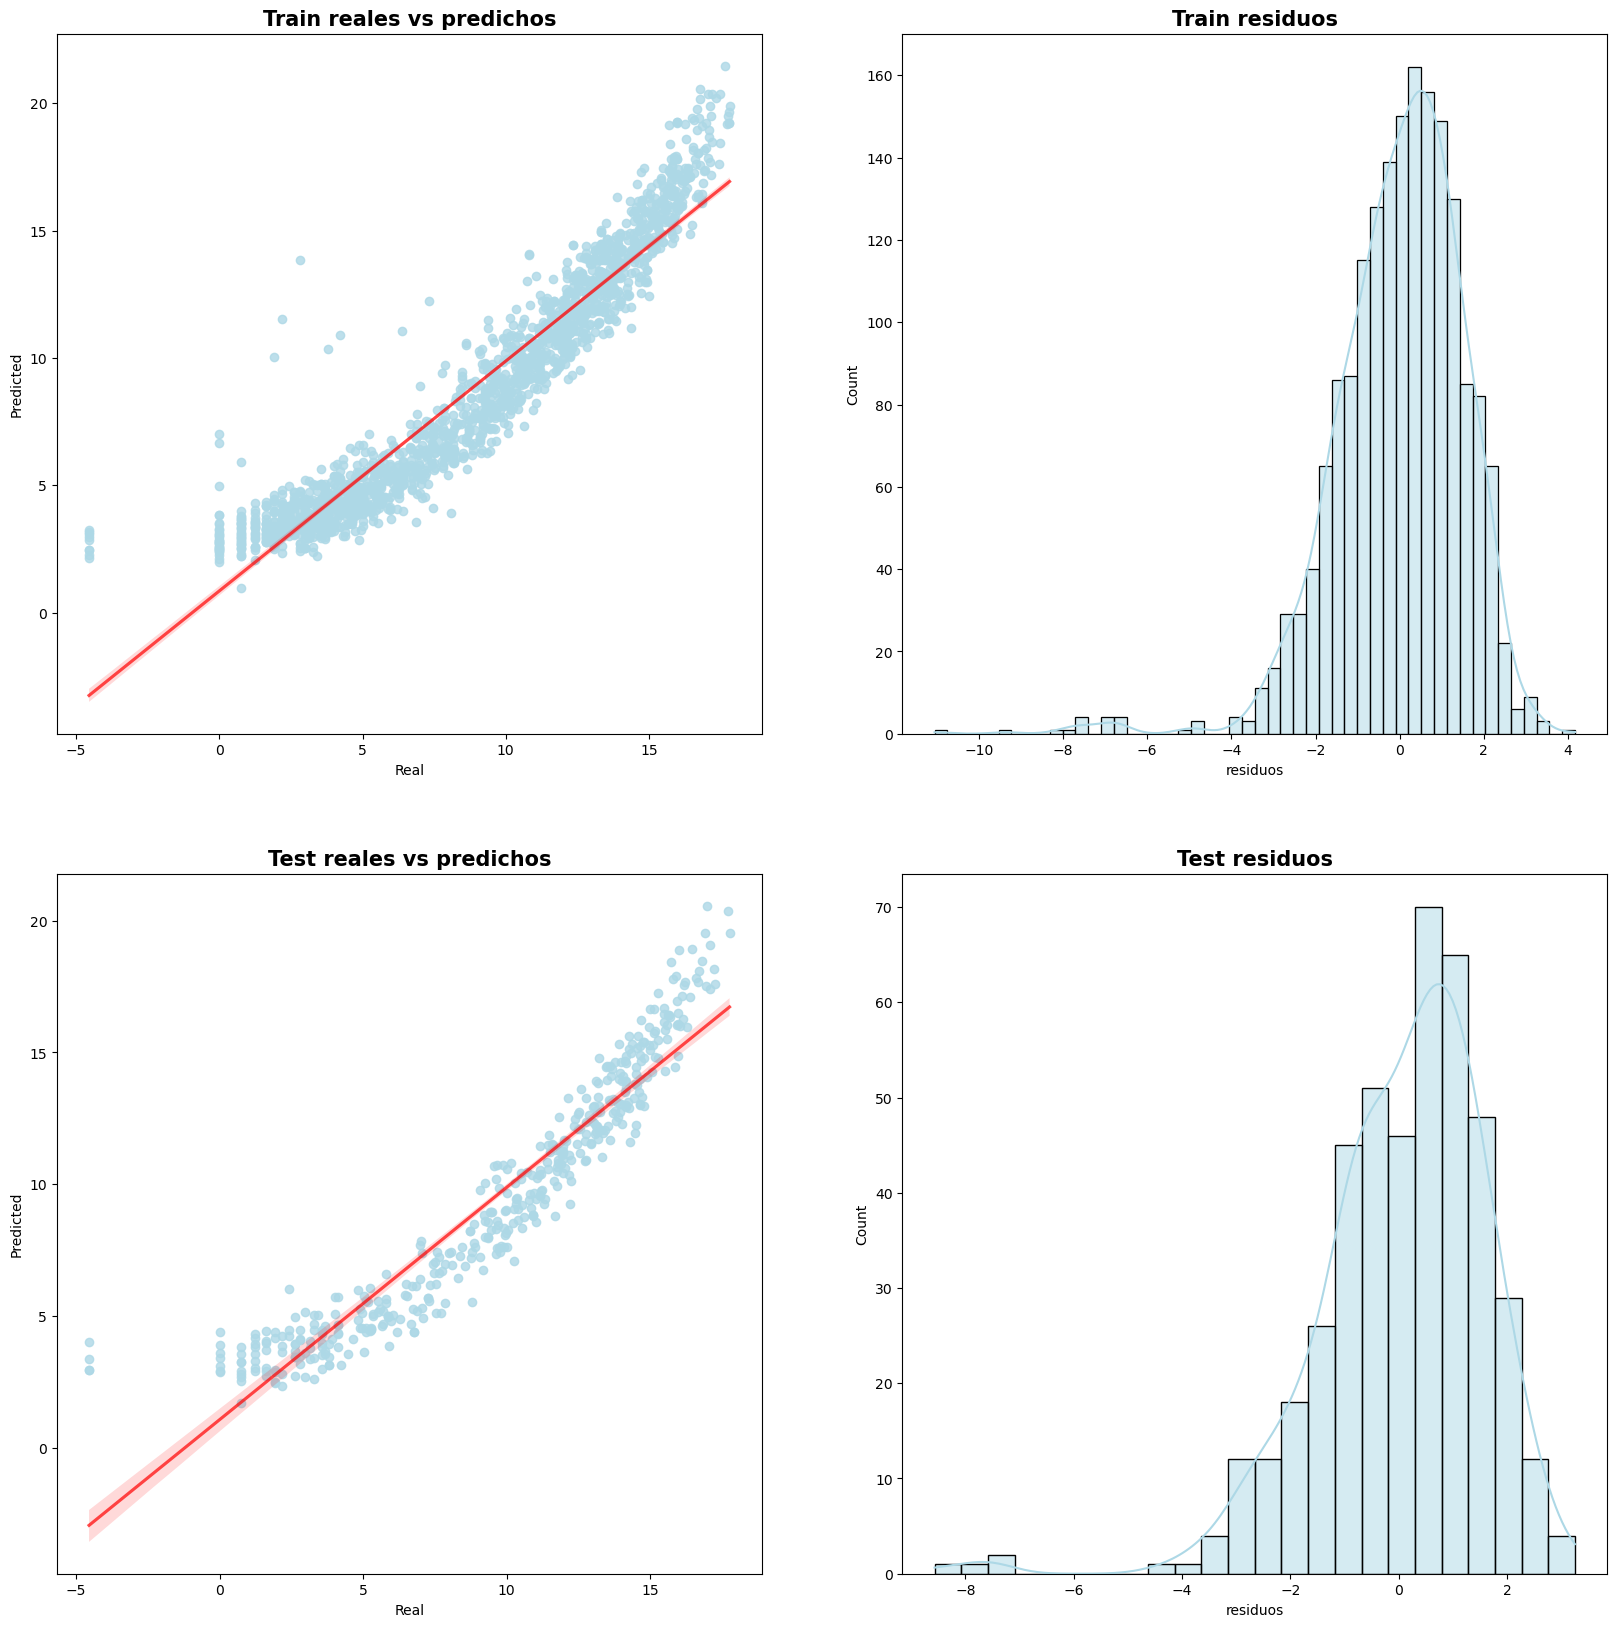

In [61]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="lightblue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "lightblue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Realizamos validación cruzada

In [62]:
cv_scores = cross_val_score(
                estimator = LinearRegression(), # algoritmo
                X         = X, 
                y         = y, 
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-1.76754256 -1.58218219 -1.3193431  -1.5753407  -1.33533981 -1.57099086
 -1.33107397 -1.55677651 -1.79563175 -2.84235948]
Média métricas de validación cruzada: -1.6676580912747743


In [63]:
metrics.SCORERS.keys() #métricas que podemos utilizar

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [64]:
# Validación cruzada repetida con múltiples métricas

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'), #las dos métricas que utilizaremos
                cv        = 10)

# Convertimos a dataframe
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.003300,0.001186,0.864735,-1.767543
1,0.002438,0.001354,0.911300,-1.582182
2,0.002290,0.001229,0.921582,-1.319343
3,0.003238,0.001277,0.900139,-1.575341
4,0.002089,0.000953,0.919472,-1.335340
5,0.002473,0.001169,0.899645,-1.570991
6,0.001943,0.001125,0.921842,-1.331074
7,0.001891,0.001047,0.893042,-1.556777
8,0.002290,0.001433,0.855982,-1.795632
9,0.001859,0.000929,0.672887,-2.842359


## Cálculo de las métricas

In [65]:
#entrenamiento
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# test
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.902692327694628
El MAE es 1.1409678372724772
El MSE es 2.2975760192117924
EL RMSE es  1.5157757153391107
Para el conjunto test:---------------
El valor de r2 score es  0.899903080925805
El MAE es 1.1897260407121202
El MSE es 2.446810373948214
EL RMSE es  1.564228363746232


Convertimos en dataframe

In [66]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,1.189726,2.446810,1.564228,0.899903,test,Linear Regresion
1,1.140968,2.297576,1.515776,0.902692,train,LinearRegression


- En el caso de train en R² tenemos un valor de 0.90, es decir, nuestro modelo es capaz de explicar un 90% de la variación en las ventas de vino. Es decir, nuestras variables predictoras explican en un 90% de la variación de los montos de venta de vino y solamente un 10% de la variación no está explicado por ninguna de las variables que tenemos.

- Veamos con el MAE(Mean absolute error), el MSE(Mean Squared Error) y RMSE(Root Mean Squared Error), vemos que los valores en general no son muy grandes por lo que podríamos concluír que nuestro modelo es bueno. 



In [67]:
valor_rmse=df_resultados['RMSE'][1]

In [68]:
valor_maximo_mnt_wines= 1493.000000 #extraido del dataframe original

In [69]:
valor_maximo_box=df["mnt_wines_box"].max()

In [70]:
valor_rmse_real= (valor_maximo_mnt_wines * valor_rmse)/ valor_maximo_box
valor_rmse_real

127.07272359923842

Realizamos una regla de 3 para observar el RMSE en dólares, comparando con el valor máximo de nuestra columna mnt_wines original, que es el monto máximo gastado en vinos en nuestro data frame.
Concluimos que nuestro modelo puede variar hasta por $127 por lo que nuestro modelo no se ajusta demasiado bien dado que nuestros rango de ventas de vinos es muy pequeño ( de 0 como mínimo y de 1493 como máximo), esto se podría deber a que no se cumplieron la asunciones.

In [71]:

df_resultados.to_csv("../Datos/vinos_regresion.csv")